# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
#Read Dataset
NOAA_df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [3]:
#Get 10-year data
NOAA_df['Date'] = pd.to_datetime(NOAA_df['Date'])
NOAA_df = NOAA_df[NOAA_df['Date']<= '2014-12-31']

#Convert to whole C degrees
NOAA_df['Data_Value'] = NOAA_df['Data_Value']/10

In [4]:
#Get 10-year record highs
decade_highs = NOAA_df[['Data_Value']].groupby(NOAA_df.Date.dt.dayofyear).max()
decade_highs = decade_highs.rename(columns={'Data_Value':'Decade High'})

#Get 10-year record lows
decade_lows = NOAA_df[['Data_Value']].groupby(NOAA_df.Date.dt.dayofyear).min()
decade_lows = decade_lows.rename(columns={'Data_Value':'Decade Low'})

In [5]:
#Get 2015 data
df2015 = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df2015['Date'] = pd.to_datetime(df2015['Date'])
df2015 = df2015.loc[(df2015['Date']<= '2015-12-31')&(df2015['Date'] > '2014-12-31')]

#Convert to whole C degrees
df2015['Data_Value'] = df2015['Data_Value']/10

In [6]:
#Get 2015 highs
highs15 = df2015[['Data_Value']].groupby(df2015.Date.dt.dayofyear).max()
highs15 = highs15.rename(columns={'Data_Value':'2015 High'})

#Get 2015 lows
lows15 = df2015[['Data_Value']].groupby(df2015.Date.dt.dayofyear).min()
lows15 = lows15.rename(columns={'Data_Value':'2015 Low'})

In [8]:
#Merge DFs
records = decade_lows.join(decade_highs, how = 'left').join(lows15,how='left').join(highs15, how = 'left')

#Get 2015 temps outside of decade records
low_record_breakers = records[(records['2015 Low']<records['Decade Low'])]
high_record_breakers = records[(records['2015 High']>records['Decade High'])]

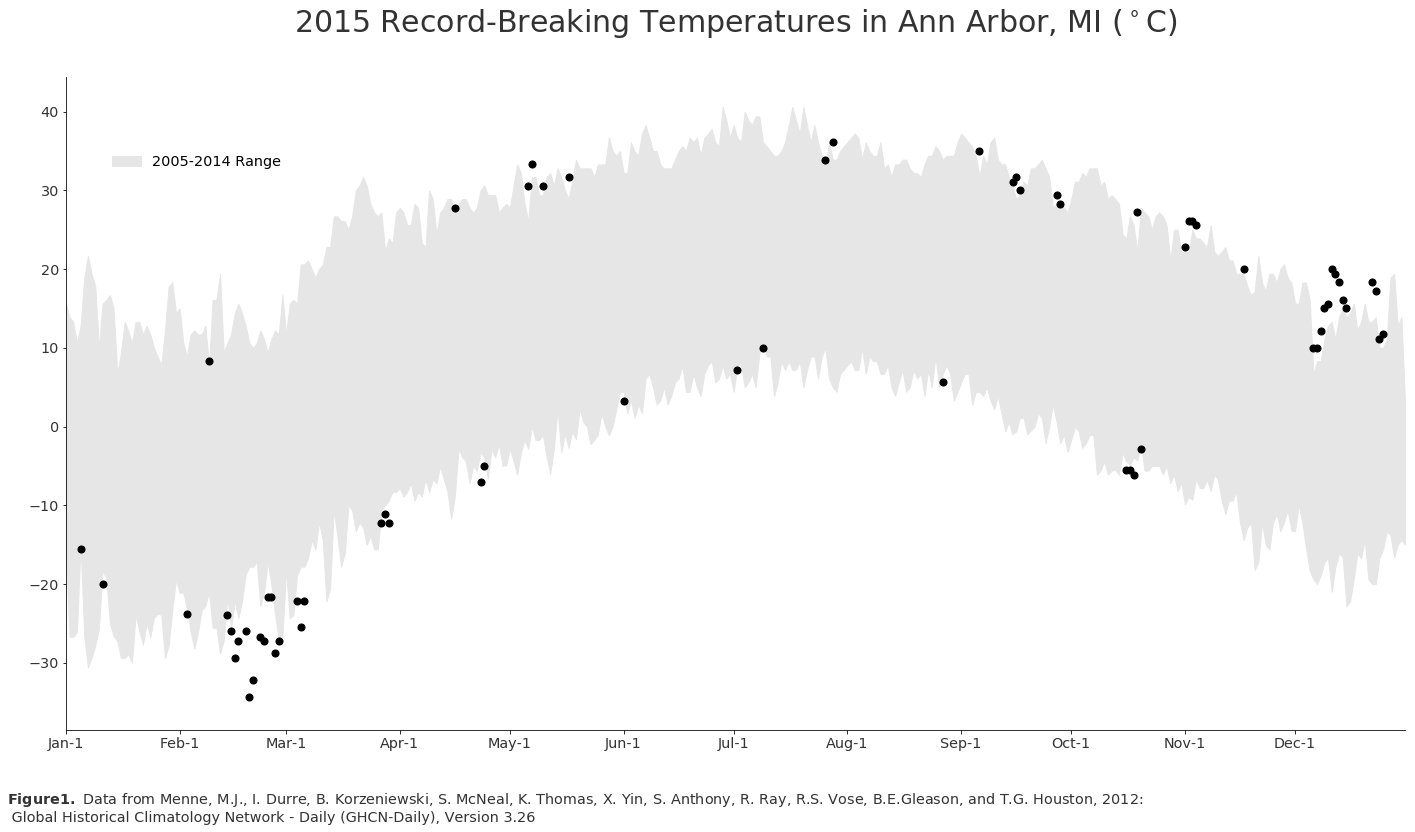

In [121]:
#Plot
plt.figure(figsize = (24,12))

#Fill between decade temp ranges
ax = plt.gca()
ax.fill_between(decade_highs.index, decade_highs['Decade High'], decade_lows['Decade Low'],  color='.9', label='2005-2014 Range')
ax.legend(loc=(.03,.85), frameon=False, fontsize = 'x-large')

#Scatter of 2015 record-breaking temps
plt.scatter(low_record_breakers.index, low_record_breakers['2015 Low'], marker='o', color='black', s= 50)
plt.scatter(high_record_breakers.index, high_record_breakers['2015 High'], marker='o', color='black', s=50)

#Rename X-ticks to Dates and change color and size
plt.xticks([1, 32, 61, 92, 122, 153, 183, 214, 245, 275, 306, 336], \
           ['Jan-1','Feb-1','Mar-1','Apr-1', 'May-1', 'Jun-1', 'Jul-1', 'Aug-1', 'Sep-1', 'Oct-1', 'Nov-1', 'Dec-1'],\
          size= 'x-large', color='.2')
plt.yticks(size = 'x-large', color='.2')

#Remove spines, align beginning of graph
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim(1,366)

#Add Title
plt.title('2015 Record-Breaking Temperatures in Ann Arbor, MI ($^\circ$C)', color='.2', size=30, y=1.06)

#Add Caption
plt.text(-15, -50,'$\\bfFigure 1. $ Data from Menne, M.J., I. Durre, B. Korzeniewski, S. McNeal, K. Thomas, X. Yin, S. Anthony, R. Ray, \
R.S. Vose, B.E.Gleason, and T.G. Houston, 2012: \n Global Historical Climatology Network - Daily (GHCN-Daily), Version 3.26', fontsize= 'x-large', color='.2')

plt.show()